<a href="https://colab.research.google.com/github/sohagkumarsaha/-Introduction-to-Radar-Using-Python-and-MATLAB/blob/master/Copy_of_sohag_shared_file_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, TimeDistributed




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#......load and convert image into rgb array
#.......no need to run this section 2nd time 
# .....for 2nd time running, just import the rgb array

clean_data = []
for img in glob.glob("/content/drive/MyDrive/solar_image/clean/*.jpg"):   #clean/*.jpg")[0:100]:
  im = Image.open(img)
  img_res = im.resize((224, 224), Image.ANTIALIAS)
  np_img = np.array(img_res)
  clean_data.append(np_img)

np.save("/content/drive/MyDrive/solar_image/clean/clean_data.npy", clean_data)  # save image into rgb array

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


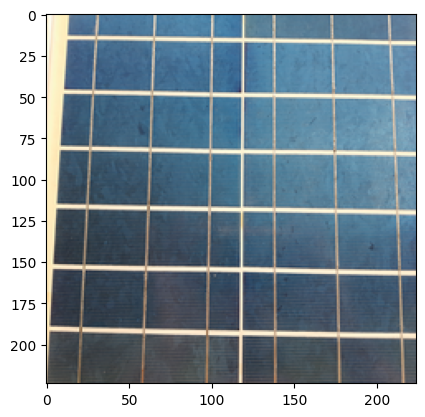

In [ ]:

clean_data = np.load('/content/drive/MyDrive/solar_image/clean/clean_data.npy', allow_pickle= True)  
plt.imshow(clean_data[0])   #plot single singgle 
plt.show()

In [ ]:
clean_data[0].shape


(224, 224, 3)

In [ ]:
#.......no need to run this section

dirty_data = []
for img in glob.glob("/content/drive/MyDrive/solar_image/dirty/*.jpg"):
  im = Image.open(img)
  img_res = im.resize((224, 224), Image.ANTIALIAS)
  np_img = np.array(img_res)
  dirty_data.append(np_img)

np.save("/content/drive/MyDrive/solar_image/dirty/dirty_data.npy", dirty_data)

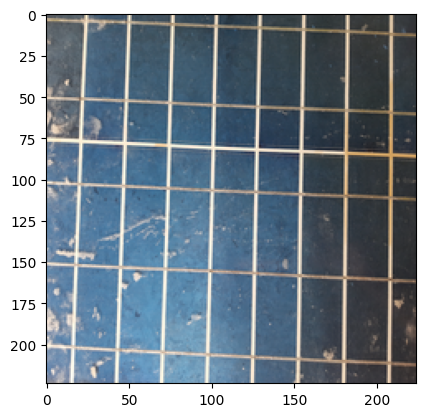

In [ ]:
dirty_data = np.load('/content/drive/MyDrive/solar_image/dirty/dirty_data.npy', allow_pickle= True)
plt.imshow(dirty_data[5])
plt.show()

In [ ]:
clean_lebel = []
for i in range(len(clean_data)):
  clean_lebel.append([0,1])  # lebel type: categorical_crossentropy

dirty_lebel = []
for j in range(len(dirty_data)):
  dirty_lebel.append([1,0])


data = np.concatenate((clean_data, dirty_data))
label = np.concatenate((clean_lebel, dirty_lebel))

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.30, random_state = 0)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
#.......Simple CNN+LSTM model

model = Sequential()

model.add(Conv2D(128, (3, 3),input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Activation('relu'))

model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.5))

# input to LSTM
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False, dropout=0.5))


model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 activation (Activation)     (None, 74, 74, 128)       0         
                                                                 
 time_distributed (TimeDistr  (None, 74, 9472)         0         
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 74, 9472)          0         
                                                                 
 lstm (LSTM)                 (None, 74, 128)           4

In [ ]:
# Complex CNN+LSTM model

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#model.add(Flatten())
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))

# input to LSTM
# extract features and dropout 
model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False, dropout=0.3))

# VGG16
model.add(Dense(units=2, activation="softmax"))
model.summary()
 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [27]:
# VGG 16
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')
#model.summary()

for layer in model.layers:
  layer.trainable = False
  #print(layer ,layer.trainable)

out = Dense(2, activation='softmax', name='output')(model.get_layer('fc2').output)


vgg_model = Model(image_input, out)

#vgg_model.summary()

553467096/553467096 [==============================] - 28s 0us/step


In [28]:
vgg_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy
history = vgg_model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), batch_size = 64)

Epoch 1/150
13/13 [==============================] - 22s 1s/step - loss: 0.8425 - accuracy: 0.5455 - val_loss: 0.6465 - val_accuracy: 0.6418
Epoch 2/150
13/13 [==============================] - 4s 353ms/step - loss: 0.6686 - accuracy: 0.6302 - val_loss: 0.5508 - val_accuracy: 0.6762
Epoch 3/150
13/13 [==============================] - 6s 453ms/step - loss: 0.5585 - accuracy: 0.7076 - val_loss: 0.4606 - val_accuracy: 0.7564
Epoch 4/150
13/13 [==============================] - 5s 359ms/step - loss: 0.4847 - accuracy: 0.7617 - val_loss: 0.4156 - val_accuracy: 0.8023
Epoch 5/150
13/13 [==============================] - 6s 453ms/step - loss: 0.4325 - accuracy: 0.8034 - val_loss: 0.3766 - val_accuracy: 0.8395
Epoch 6/150
13/13 [==============================] - 4s 353ms/step - loss: 0.3945 - accuracy: 0.8317 - val_loss: 0.3417 - val_accuracy: 0.8711
Epoch 7/150
13/13 [==============================] - 4s 355ms/step - loss: 0.3636 - accuracy: 0.8575 - val_loss: 0.3331 - val_accuracy: 0.8768
E

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), batch_size = 64)

Epoch 1/150
13/13 [==============================] - 18s 322ms/step - loss: 0.6932 - accuracy: 0.5872 - val_loss: 0.6266 - val_accuracy: 0.6762
Epoch 2/150
13/13 [==============================] - 3s 201ms/step - loss: 0.6859 - accuracy: 0.5663 - val_loss: 0.6259 - val_accuracy: 0.6762
Epoch 3/150
13/13 [==============================] - 3s 196ms/step - loss: 0.6669 - accuracy: 0.6069 - val_loss: 0.6140 - val_accuracy: 0.6791
Epoch 4/150
13/13 [==============================] - 3s 220ms/step - loss: 0.6553 - accuracy: 0.6118 - val_loss: 0.6077 - val_accuracy: 0.6791
Epoch 5/150
13/13 [==============================] - 3s 209ms/step - loss: 0.6487 - accuracy: 0.6339 - val_loss: 0.5996 - val_accuracy: 0.6791
Epoch 6/150
13/13 [==============================] - 3s 199ms/step - loss: 0.6342 - accuracy: 0.6437 - val_loss: 0.5853 - val_accuracy: 0.6963
Epoch 7/150
13/13 [==============================] - 2s 177ms/step - loss: 0.6484 - accuracy: 0.6278 - val_loss: 0.5914 - val_accuracy: 0.699

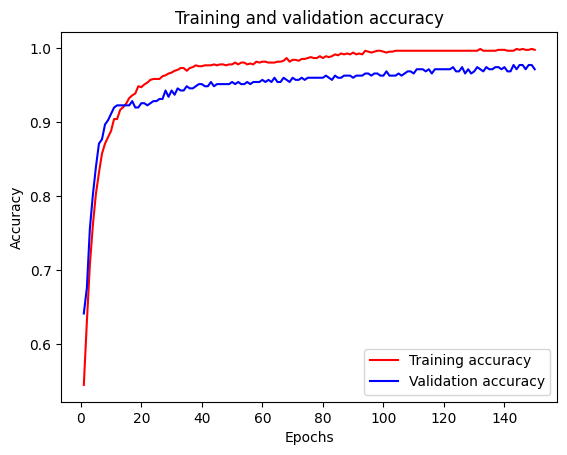

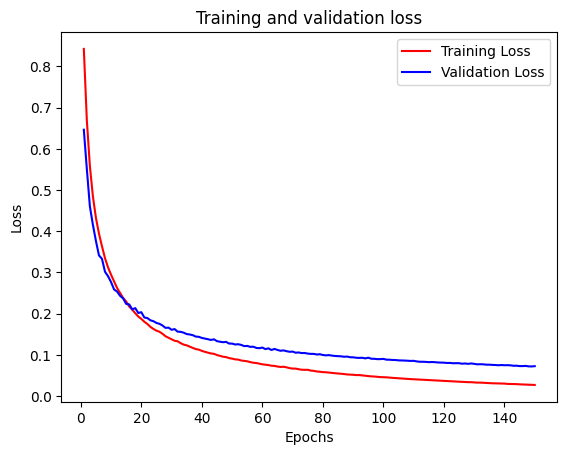

In [29]:
# Assuming that you have a model with history attribute
# which contains the training and validation accuracy

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plotting the training and validation accuracy
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation accuracy
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

11/11 [==============================] - 2s 30ms/step
confusion matrix:
 [[228   8]
 [ 14  99]]
Accuracy: 0.94
Precision: 0.93
Recall: 0.88


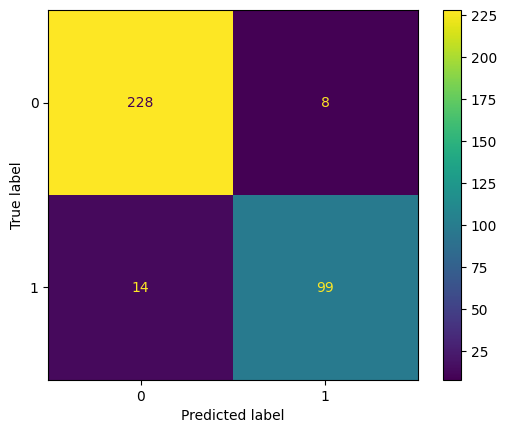

In [ ]:
# import necessary libraries


# Assuming that you have a trained model and a set of test data (X_test)

# Get the predicted probabilities for each class
y_pred = model.predict(x_test)

# Convert probabilities to predicted class labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

#print(y_true)
#print(y_pred)

# calculate precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
con_mat=confusion_matrix(y_true, y_pred)
accuracy=accuracy_score(y_true, y_pred)

# print the results
print("confusion matrix:\n",con_mat)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))



cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,